## Wave Equation via Nueral-PDE


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import random
from sklearn.metrics import mean_squared_error
import matplotlib.image as mpimg




In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

Num GPUs Available:  1


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12748561806997638775,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 5754978304
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10663623107787621976
 physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"]

In [3]:
from functions import data_normalize, flattern, DE_Learner, split_final


In [4]:
output ='./graphs/'

#### 1D Wave Equation
$u_{tt} = cu_{xx}$

In [5]:
#The exact solution data
def u(x,t):
    return [0.5*(np.sin(4*np.pi*xi+t) + np.sin(4*np.pi*xi-t)) for xi in x ]
def wave(dx, dt, nx, nt ):
    T = dt*nt
    x0 = np.linspace(0,nx*dx,nx+1)
    wave_dat = [[]for _ in range(len(x0))]
    t0 = 0
    for i in range(nt+1):
        value = u(x0,t0)
        for j in range(len(wave_dat)):
            wave_dat[j].append(value[j])#+np.random.normal(0,.01))
            t0 +=dt
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    ax1.plot(x0,u(x0,0))
    ax1.set_title('Initial Condition')
    ax2 = fig.add_subplot(212)
    ax2.plot(x0,u(x0,T))
    ax2.set_title('Final State t=: '+str(T))
    plt.ylim(-1,1)
    plt.show()
    return wave_dat

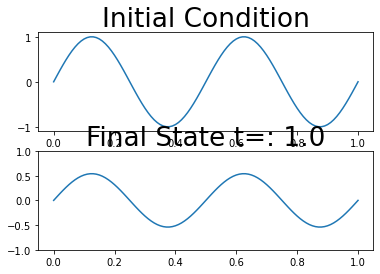

101 1001


In [10]:
dt = .001
dx = .01
nx = 100
nt = 1000
wave_dat = wave(dx,dt,nx,nt)
print(len(wave_dat),len(wave_dat[0]))

In [11]:
len(wave_dat[0])

1001

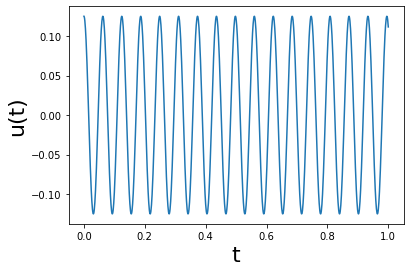

In [12]:
matplotlib.rcParams.update({'font.size': 22})
wave_ts = plt.figure()
plt.plot(np.linspace(0,nt*dt,nt+1),wave_dat[1])
plt.xlabel('t')
plt.ylabel('u(t)')
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
wave_ts.savefig(output +'wave_time_series.svg',bbox_inches='tight')



In [13]:
t1, t2 = 30, 10
wave_final_x = [w[-t1-t2:-t2] for w in wave_dat]
wave_final_y = [w[-t2:] for w in wave_dat]
wave_final_x = np.array(wave_final_x).reshape(1, len(wave_final_x),len(wave_final_x[0]))
wave_final_y = np.array(wave_final_y).reshape(1, len(wave_final_y),len(wave_final_y[0]))
wave_dat = np.array([w[:-t1-t2] for w in wave_dat])
wave_final_x.shape

(1, 101, 30)

###########################START##########################
Whole data size(batch, row, column) (921, 101, 30) (921, 101, 10)
Train data size(batch, row, column) (736, 101, 30) (736, 101, 10)
test data size(batch, row, column) (185, 101, 30) (185, 101, 10)
Epoch 1/50
294/294 [==============================] - 10s 19ms/step - loss: 0.0166 - val_loss: 7.0830e-04

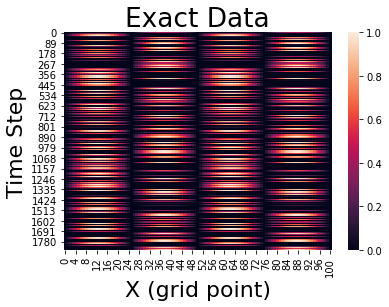

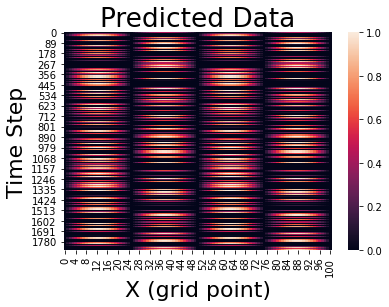

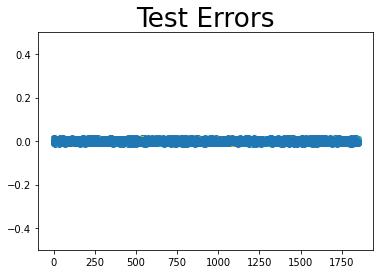

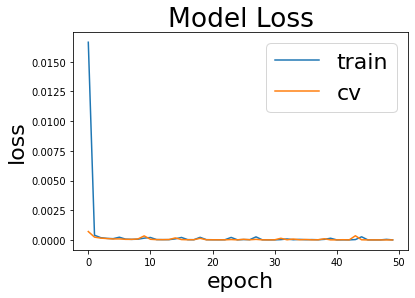

----------------MSE:  3.1344914181001636e-06
###########################END##########################


In [14]:
wave_py, wave_ty,wave_mse, wavemodel = DE_Learner(wave_dat, t1, t2, 1 , .2, 'wave')

In [15]:
wave_final_pred = wavemodel.predict(wave_final_x,verbose=1)
wave_final_py = np.array(flattern(wave_final_pred)).T
wave_final_ty = np.array(flattern(wave_final_y)).T
print(len(wave_final_py))

1/1 [==============================] - 0s 16ms/step
10


1850


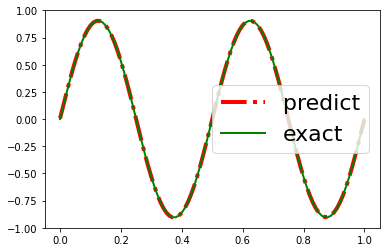

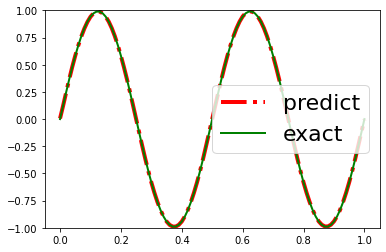

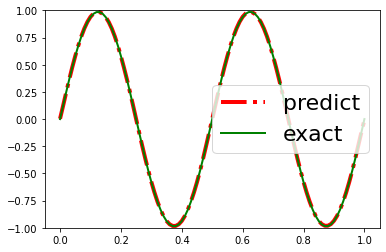

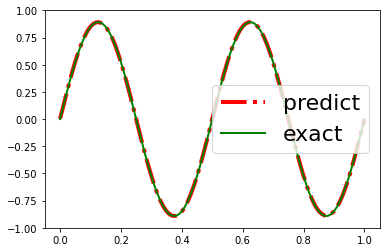

In [16]:
print(len(wave_py))
wave_idx = [0,3,6,9]
nx = 100
dx = .01
for i in wave_idx:
    fg_wave = plt.figure()
    plt.plot(np.linspace(0,nx*dx, nx+1),wave_final_py[i],c='r',linestyle='-.',linewidth=4.0,label = 'predict')
    plt.plot(np.linspace(0,nx*dx, nx+1),wave_final_ty[i],c='g',linewidth=2.0, label = 'exact')
    plt.ylim(-1,1)
    #plt.legend(loc=3)
    plt.legend()
    fg_wave.savefig(output +'wave_final_'+str(i)+'.pdf',bbox_inches='tight')

